# A U-Net for Drosophila wing segmentation

### Dealing with images

In [1]:
from PIL import Image
import numpy as np

def tif2array(image_path):
    ## Imports an arbitrary .tif image and creates a numpy array with the pixel-values
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_ground_truth(image_path = "./data/groundTruth.tif"):
    ## Imports a .tif image with the ground truth (drosophila wing) 
    ## and creates a numpy array with the pixel-values
    
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_raw_data(image_path = "./data/rawData.tif"):
    ## Imports a .tif image with the raw data (drosophila wing)
    ## and creates a numpy array with the pixel-values
    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])
    
def load_crop(image_path="./data/rawData.tif", origin=(400,400), length=100, width=100):
    ## Imports an arbitrary .tif image region
    ## and creates a numpy array with the pixel-values

    im = Image.open(image_path)
    return np.array(im.getdata()).reshape(im.size[::-1])[origin[0]:origin[0]+length,origin[1]:origin[1]+width]

(6, 1)


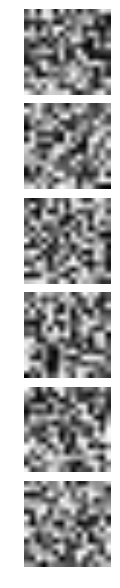

In [268]:
# plotting
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

def plot_patches(patches=[], dims=(1,1)):
    plotsInX = dims[0]
    plotsInY = dims[1]
    
    fig, ax = plt.subplots(plotsInX, plotsInY)
    if (ax.ndim == 1):
        ax = np.reshape(ax, (dims[0], dims[1]))
  
    print ax.shape
    for i in range(plotsInX):
        for j in range(plotsInY):
            ax[i,j].axis('off')
            ax[i,j].imshow(patches[j + i*plotsInY], cmap="gray")
            
    fig.subplots_adjust(hspace=0.1)
    fig.subplots_adjust(wspace=0.1)
#     fig.tight_layout()
    plt.show()
    
    
patches = []    
for i in range(6):
    patches.append(np.random.rand(15,15))   
    
    
plot_patches(patches=patches, dims=(6,1))


In [266]:
    raw_data = '/Users/dibrov/Documents/python/runforest/FlyWingData/rawData.tif'
    ground_truth = '/Users/dibrov/Documents/python/runforest/FlyWingData/groundTruth.tif'

    # length and width of the patch
    L = 100
    W = 100

    # trainig set: nine pathces
    p1 = load_crop(origin=(400,400), length=L, width=W)
    p2 = load_crop(origin=(864,3032), length=L, width=W)
    p3 = load_crop(origin=(1056,1038), length=L, width=W)
    p4 = load_crop(origin=(1278,2601), length=L, width=W)
    p5 = load_crop(origin=(912,2157), length=L, width=W)
    p6 = load_crop(origin=(1143,1911), length=L, width=W)
    p7 = load_crop(origin=(741,387), length=L, width=W)
    p8 = load_crop(origin=(1548,1281), length=L, width=W)
    p9 = load_crop(origin=(459,3363), length=L, width=W)

    # three more patches

    p10 = load_crop(origin=(727,2262), length=L, width=W)
    p11 = load_crop(origin=(944,555), length=L, width=W)
    p12 = load_crop(origin=(487,660), length=L, width=W)

    # trainig set labels
    la1_sq = load_crop(image_path=ground_truth, origin=(400,400), length=L, width=W)
    la2_sq = load_crop(image_path=ground_truth, origin=(864,3032), length=L, width=W)
    la3_sq = load_crop(image_path=ground_truth, origin=(1056,1038), length=L, width=W)
    la4_sq = load_crop(image_path=ground_truth, origin=(1278,2601), length=L, width=W)
    la5_sq = load_crop(image_path=ground_truth, origin=(912,2157), length=L, width=W)
    la6_sq = load_crop(image_path=ground_truth, origin=(1143,1911), length=L, width=W)
    la7_sq = load_crop(image_path=ground_truth, origin=(741,387), length=L, width=W)
    la8_sq = load_crop(image_path=ground_truth, origin=(1548,1281), length=L, width=W)
    la9_sq = load_crop(image_path=ground_truth, origin=(459,3363), length=L, width=W)

    la10_sq = load_crop(image_path=ground_truth, origin=(727,2262), length=L, width=W)
    la11_sq = load_crop(image_path=ground_truth, origin=(944,555), length=L, width=W)
    la12_sq = load_crop(image_path=ground_truth, origin=(487,660), length=L, width=W)


KeyboardInterrupt: 

In [271]:
# generate more patches
big_patch_set = []
big_label_set = []

step = 100
num_x = 2
num_y = 2
L=100
W=100
origins = np.array([(400,400), (864, 3032), (1056,1038), (1278,2601), (912,2157), (1143,1911), (741,387), (1548,1281), (459,3363)])

for origin in origins:
    for dx in range(num_x):
        for dy in range(num_y):
            current_origin = (origin[0]+dx*step, origin[1]+dy*step)
            p = load_crop(origin=current_origin, length=L, width=W)
            l = load_crop(image_path=ground_truth, origin=current_origin, length=L, width=W)
            min_p = p.min()
            pn = (1.0*(p - min_p)/(p.max()-min_p))
            ln = l/255
            big_patch_set.append(pn)
            big_label_set.append(ln)

In [272]:
big_patch_set = np.asarray(big_patch_set, dtype = np.float32)
big_label_set = np.asarray(big_label_set, dtype = np.float32)

(8, 4)


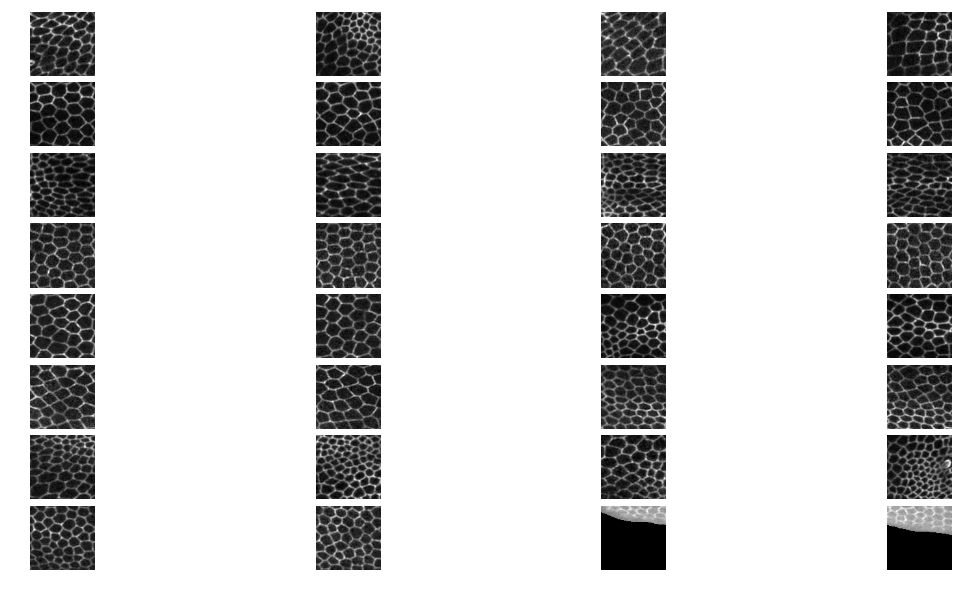

In [276]:
plot_patches(big_patch_set, (8,4))

In [280]:
x = big_patch_set.reshape(36,100,100,1)
y = big_label_set.reshape(36,100,100,1)

catlab = []
for i in range(y.shape[0]):
    catlab.append(keras.utils.to_categorical(y[i,:,:,0].reshape(100*100,1)))
catlab= np.asarray(catlab)

(2, 9)


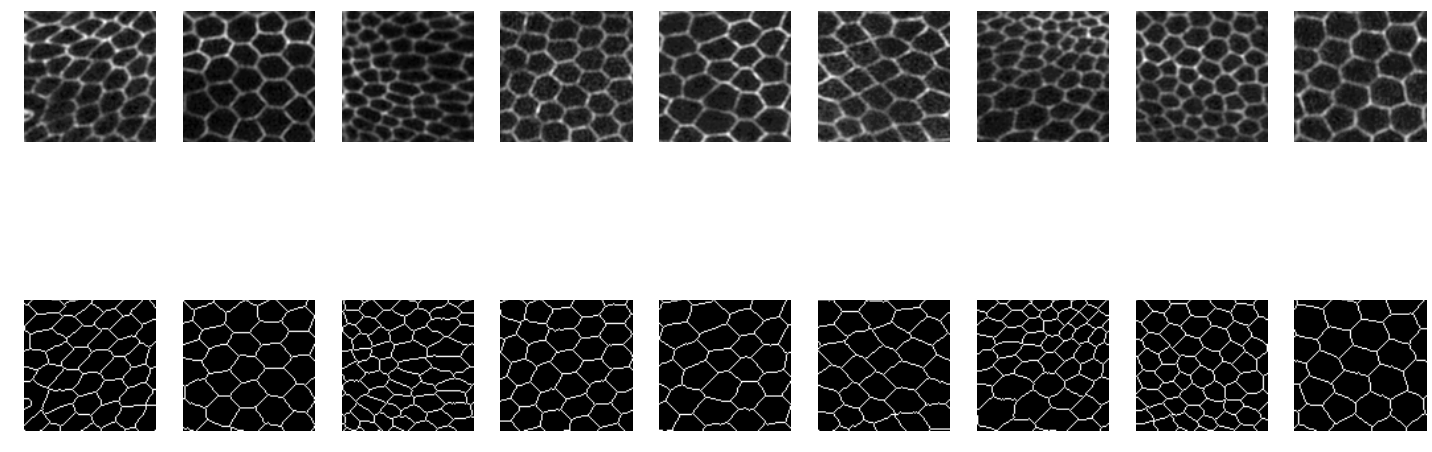

In [55]:
patches = [p1,p2,p3,p4,p5,p6,p7,p8,p9, la1_sq, la2_sq, la3_sq, la4_sq, la5_sq, la6_sq, la7_sq, la8_sq, la9_sq]




patches_train= np.array([p1,p2,p3,p4,p5,p6,p7,p8,p9])

labels_train= np.array([la1_sq, la2_sq, la3_sq, la4_sq, la5_sq, la6_sq, la7_sq, la8_sq, la9_sq])
plot_patches(patches=patches, dims=(2,9))



### Normalisation

In [123]:
patches_train_normalized = []
for item in patches_train:
    item_normalized = (item-item.min())*1.0/(item.max() - item.min())
    patches_train_normalized.append(item_normalized.astype(np.float32))
    
patches_train_normalized = np.asarray(patches_train_normalized)

x = patches_train_normalized.reshape(9,100,100,1)

In [124]:
x[0,:,:,0].min()

0.0

In [125]:
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam, SGD, Adagrad
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, concatenate, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout


In [225]:
    inputs = Input((100, 100,1))
    conv1 = Conv2D(32, (3, 3), strides=(1,1), activation='relu', padding='same', data_format='channels_last')(inputs)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    #
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

    up1 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2], axis=3)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)
    #
    up2 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1], axis=3)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)
    #
    # here nb_classes used to be just the number 2
    conv6 = Conv2D(2, (1, 1), activation='relu',padding='same')(conv5)
    conv6 = core.Reshape((2, 100*100))(conv6)
    conv6 = core.Permute((2,1))(conv6)
    ############
    conv7 = core.Activation('softmax')(conv6)

    model = Model(inputs=inputs, outputs=conv7)
#     model.compile(optimizer=Adam(lr=0.0001), loss=my_categorical_crossentropy((1,100)), metrics=['accuracy'])
    model.compile(optimizer=Adam(lr=0.001), loss=my_categorical_crossentropy((1,10)), metrics=['accuracy'])
#     model.compile(optimizer=Adam(lr=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])
#     model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [339]:
    inputs = Input((100, 100,1))
    conv1 = Conv2D(8, (3, 3), strides=(1,1), activation='relu', padding='same', data_format='channels_last')(inputs)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Conv2D(8, (3,3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    #
    conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    #
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)

    up1 = concatenate([UpSampling2D(size=(2, 2))(conv3), conv2])
    conv4 = Conv2D(16, (3, 3), activation='relu', padding='same')(up1)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv4)
    #
    up2 = concatenate([UpSampling2D(size=(2, 2))(conv4), conv1])
    conv5 = Conv2D(8, (3, 3), activation='relu', padding='same')(up2)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Conv2D(8, (3, 3), activation='relu', padding='same')(conv5)
    #
    # here nb_classes used to be just the number 2
    conv6 = Conv2D(2, (1, 1), activation='relu',padding='same')(conv5)
    conv6 = core.Reshape((2, 100*100))(conv6)
    conv6 = core.Permute((2,1))(conv6)
    ############
    conv7 = core.Activation('softmax')(conv6)

    model = Model(inputs=inputs, outputs=conv7)
#     model.compile(optimizer=Adam(lr=0.0001), loss=my_categorical_crossentropy((1,100)), metrics=['accuracy'])
    model.compile(optimizer=Adam(lr=0.0005), loss=my_categorical_crossentropy((1,1)), metrics=['accuracy'])
#     model.compile(optimizer=Adam(lr=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])
#     model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [340]:
model.fit(x, catlab, epochs=300, batch_size=36)
# model.fit(nsw, nsw_l_norm.reshape(9,100*100,1), epochs=100)

Epoch 1/300
36/36 [==============================] - 4s - loss: 0.6923 - acc: 0.5423
Epoch 2/300
36/36 [==============================] - 1s - loss: 0.6920 - acc: 0.5279
Epoch 3/300
36/36 [==============================] - 1s - loss: 0.6916 - acc: 0.5301
Epoch 4/300
36/36 [==============================] - 1s - loss: 0.6911 - acc: 0.5311
Epoch 5/300
36/36 [==============================] - 1s - loss: 0.6902 - acc: 0.5372
Epoch 6/300
36/36 [==============================] - 1s - loss: 0.6891 - acc: 0.5438
Epoch 7/300
36/36 [==============================] - 1s - loss: 0.6883 - acc: 0.5423
Epoch 8/300
36/36 [==============================] - 1s - loss: 0.6865 - acc: 0.5509
Epoch 9/300
36/36 [==============================] - 1s - loss: 0.6850 - acc: 0.5520
Epoch 10/300
36/36 [==============================] - 1s - loss: 0.6836 - acc: 0.5520
Epoch 11/300
36/36 [==============================] - 1s - loss: 0.6809 - acc: 0.5572
Epoch 12/300
36/36 [==============================] - 1s - loss

KeyboardInterrupt: 

In [177]:
weird = np.reshape(patches_train, (9,100,100,1))

In [72]:
weird.shape

(9, 100, 100, 1)

In [73]:
r = np.random.rand(100,100)

In [74]:
r.shape

(100, 100)

In [75]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [57]:
nsw = patches_train_normalized.reshape(9,100,100,1)

In [58]:
nsw.shape

(9, 100, 100, 1)

In [100]:
nsw_l_norm.shape

(9, 100, 100, 1)

In [56]:
nsw_l = labels_train.reshape(9,100,100,1)

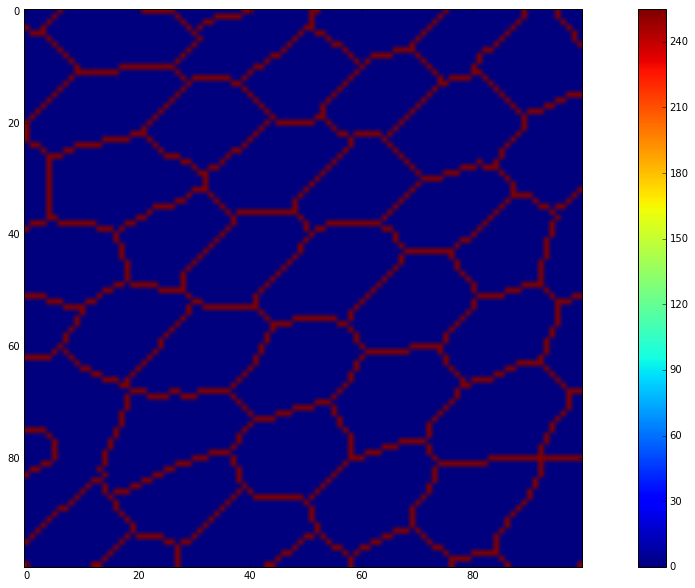

In [251]:
plt.imshow(nsw_l[0,:,:,0])
plt.colorbar()

In [27]:
nsw_l_norm = nsw_l/255

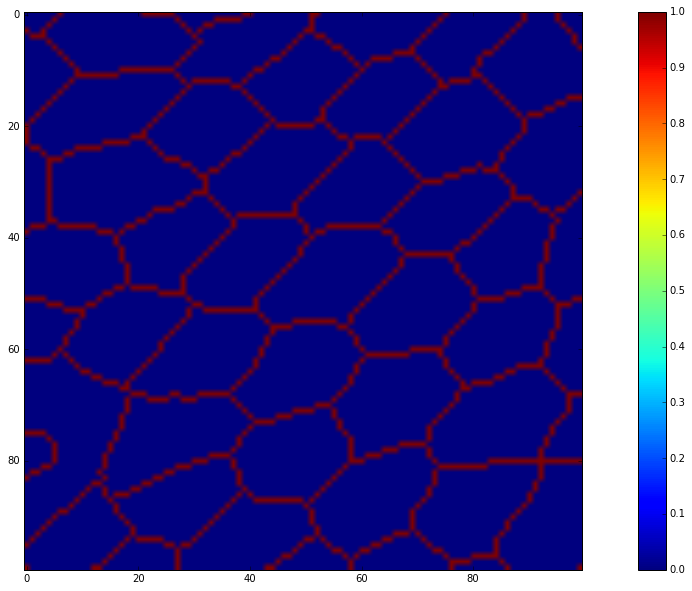

In [28]:
plt.imshow(nsw_l_norm[0,:,:,0]); plt.colorbar()

In [27]:
type(nsw_l[0,1,1,0])

numpy.int64

In [28]:
UpSampling2D(size=(2, 2))()

AttributeError: 'numpy.ndarray' object has no attribute 'get_shape'

numpy.float32

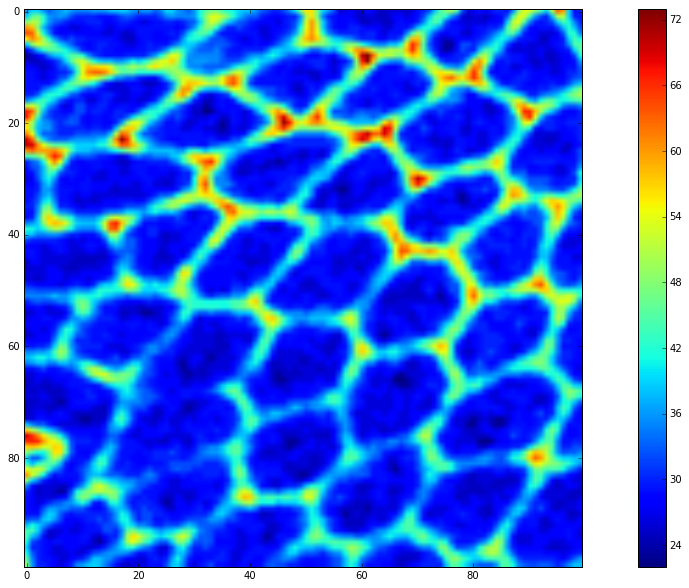

In [316]:
# plt.imshow(x[0,:,:,0]), plt.colorbar()
plt.imshow(p1), plt.colorbar()
x[3,:,:,0].max()

type(x[3,0,0,0])

In [341]:

p1_normalised = (p1-p1.min())*1.0/(p1.max()-p1.min())
p1r = p1_normalised.reshape(1,100,100,1)
p1pr = model.predict(p1r)
p1pr = p1pr[:,:,1].reshape(100,100)

(<matplotlib.image.AxesImage at 0x130740710>,
 <matplotlib.colorbar.Colorbar at 0x11edc9910>)

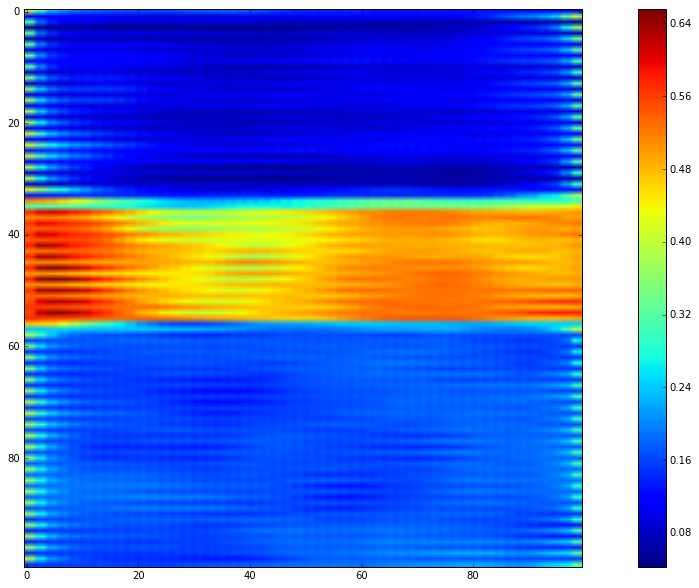

In [342]:
plt.imshow(p1pr), plt.colorbar()

In [254]:
from keras import backend as K
import keras
def my_categorical_crossentropy(weights =(1., 1.)):
    def catcross(y_true, y_pred):
        return -(weights[0] * K.mean(y_true[:,:,0]*K.log(y_pred[:,:,0]+K.epsilon())) +
                 weights[1] * K.mean(y_true[:,:,1]*K.log(y_pred[:,:,1]+K.epsilon())))

        # return -(K.mean(y_true[:,:,0]*K.log(y_pred[:,:,0]+K.epsilon()))+K.mean(y_true[:,:,1]*K.log(y_pred[:,:,1]+K.epsilon())))
    return catcross

In [32]:
(la1_sq/255).sum()

1010

In [33]:
1010./10000

0.101

In [40]:
keras.utils.to_categorical([1,0,0,1,0], 2)

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [41]:
catLab = []
for i in range(9):
    catLab.append(keras.utils.to_categorical(nsw_l_norm[i,:,:,0].reshape(100*100,1)))

In [42]:
catlab = np.asarray(catLab)

In [43]:
catlab.shape

(9, 10000, 2)

In [44]:
type(catlab)

numpy.ndarray

In [45]:
catlab

array([[[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 0.,  1.]],

       [[ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 0.,  1.],
        [ 1.,  0.],
        [ 0.,  1.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       ..., 
       [[ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 0.,  1.],
        [ 1.,  0.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]],

       [[ 1.,  0.],
        [ 0.,  1.],
        [ 1.,  0.],
        ..., 
        [ 1.,  0.],
        [ 1.,  0.],
        [ 1.,  0.]]])

In [322]:
catlab.shape

(36, 10000, 2)

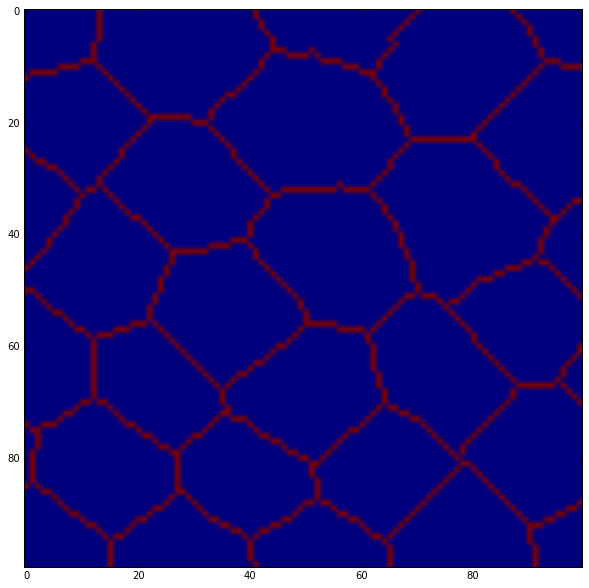

In [328]:
plt.imshow(catlab[35,:,1].reshape(100,100))